In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import time

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

In [2]:
import pandas_datareader.data as pdr

C:\Users\kazuy\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
start_date = '2001-01-02'
end_date = '2016-12-30'

fx_jpusdata = pdr.DataReader("DEXJPUS", "fred", start_date, end_date)
fx_useudata = pdr.DataReader("DEXUSEU", "fred", start_date, end_date)

# 問題1

欠損値を、直近の前の日付で補完する

In [4]:
fx_jpusdata_filled = fx_jpusdata.fillna(method='ffill')
fx_useudata_filled = fx_useudata.fillna(method='ffill')

# 例題2

各統計量の確認と、時系列のグラフ化

In [5]:
fx_jpusdata_filled.describe()

,DEXJPUS
count,4174.000000
mean,105.775220
std,14.612526
min,75.720000
25%,95.365000
50%,108.105000
75%,118.195000
max,134.770000


In [6]:
fx_useudata_filled.describe()

,DEXUSEU
count,4174.000000
mean,1.239633
std,0.165265
min,0.837000
25%,1.128100
50%,1.274700
75%,1.352575
max,1.601000


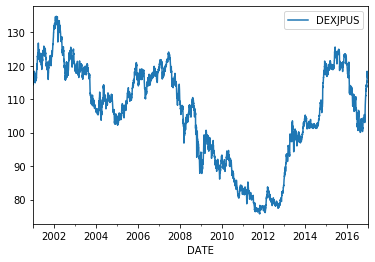

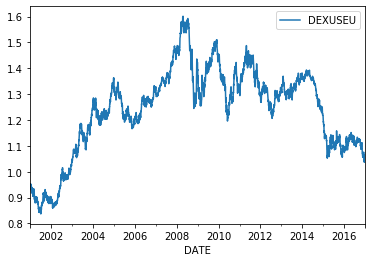

In [7]:
fx_jpusdata_filled.plot()
fx_useudata_filled.plot()

# 例題3

当日と前日の差分を取り、変化率をヒストグラムで表示する

In [9]:
fx_jpusdata_diff_rate = (fx_jpusdata_filled - fx_jpusdata_filled.shift(1)) / fx_jpusdata_filled
fx_useudata_diff_rate = (fx_useudata_filled - fx_useudata_filled.shift(1)) / fx_useudata_filled

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A435C24978>]],
      dtype=object)

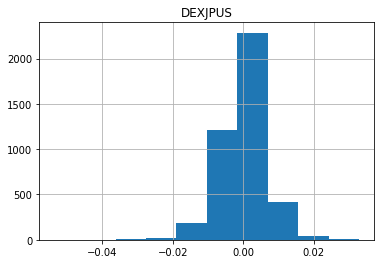

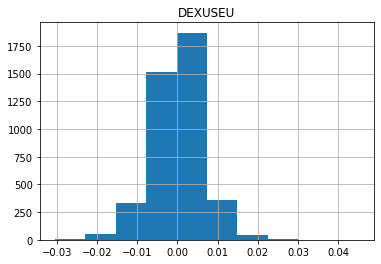

In [10]:
fx_jpusdata_diff_rate.hist()
fx_useudata_diff_rate.hist()

# 例題4

将来の価格を予測するモデルを構築する

In [11]:
#"DEXJPUS"
#"DEXUSEU"
used_data = {
    'data': "DEXJPUS",
    'train': ['2016-11-01', '2016-11-30'],
    'test': ['2016-12-01', '2016-12-31']
}

In [16]:
train_data = pdr.DataReader(
    used_data['data'],
    "fred",
    used_data['train'][0],
    used_data['train'][1]).fillna(method='ffill')
test_data = pdr.DataReader(
    used_data['data'],
    "fred",
    used_data['test'][0],
    used_data['test'][1]).fillna(method='ffill')

XY = {
    'train': pd.concat(
        [train_data,
         train_data.shift(1),
         train_data.shift(2),
         train_data.shift(3)],
        axis=1).dropna(),
    'test': pd.concat(
        [test_data,
         test_data.shift(1),
         test_data.shift(2),
         test_data.shift(3)],
        axis=1).dropna()
}

In [17]:
XY['train'].columns = ['b3', 'b2', 'b1', 'answer']
XY['test'].columns = ['b3', 'b2', 'b1', 'answer']

X_train = XY['train'].drop('answer', axis=1)
y_train = XY['train']['answer']
X_test = XY['test'].drop('answer', axis=1)
y_test = XY['test']['answer']

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print('train:', model.score(X_train, y_train))
print('test:', model.score(X_test, y_test))

train: 0.9451788510645511
test: 0.5715828882014964


# 以下、↓解答のコピペ

例題3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F083D68AC8>]],
      dtype=object)

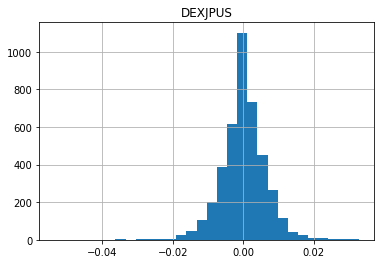

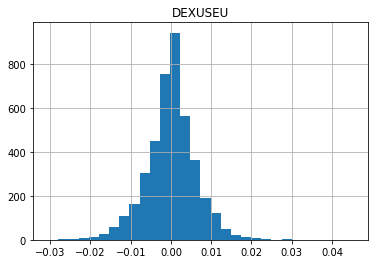

In [10]:
fx_jpusdata_diff_rate.hist(bins=30)
fx_useudata_diff_rate.hist(bins=30)

例題4

In [11]:
merge_data_jpusdata = pd.concat([
        fx_jpusdata_filled,
        fx_jpusdata_filled.shift(1),
        fx_jpusdata_filled.shift(2),
        fx_jpusdata_filled.shift(3)
    ], axis=1)
merge_data_jpusdata.columns = ['today', 'pre_1', 'pre_2', 'pre_3']
merge_data_jpusdata_nona = merge_data_jpusdata.dropna()
merge_data_jpusdata_nona.head()

,today,pre_1,pre_2,pre_3
DATE,,,,
2001-01-05,116.19,115.47,114.26,114.73
2001-01-08,115.97,116.19,115.47,114.26
2001-01-09,116.64,115.97,116.19,115.47
2001-01-10,116.26,116.64,115.97,116.19
2001-01-11,117.56,116.26,116.64,115.97


In [12]:
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta

l_model = LinearRegression()

pre_term = '2016-11'
pos_term = '2016-12'

for pre_list in (['pre_1'], ['pre_1', 'pre_2'], ['pre_1', 'pre_2', 'pre_3']):
    print(pre_list)
    train = merge_data_jpusdata_nona[pre_term]
    X_train = pd.DataFrame(train[pre_list])
    y_train = train['today']
    test = merge_data_jpusdata_nona[pos_term]
    X_test = pd.DataFrame(test[pre_list])
    y_test = test['today']
    
    fit_model = l_model.fit(X_train, y_train)
    print('train:', fit_model.__class__.__name__, fit_model.score(X_train, y_train))
    print('test:', fit_model.__class__.__name__, fit_model.score(X_test, y_test))    

['pre_1']
train: LinearRegression 0.9493027692165822
test: LinearRegression 0.5687852242036819
['pre_1', 'pre_2']
train: LinearRegression 0.9494020654841917
test: LinearRegression 0.5627029016415758
['pre_1', 'pre_2', 'pre_3']
train: LinearRegression 0.9509299545649994
test: LinearRegression 0.5404389520765218
